In [2]:
# Libraries
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
train.shape


(1017209, 9)

In [5]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
train['Store'].value_counts()

1023    942
666     942
675     942
163     942
674     942
       ... 
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

In [7]:
#convertimos a datetime object de pandas
import datetime
train.Date = pd.to_datetime(train.Date)

In [8]:
# atomizamos fecha
train['year'] = pd.DatetimeIndex(train.Date).year
train['month'] = pd.DatetimeIndex(train.Date).month
train['day'] = pd.DatetimeIndex(train.Date).day
train['day_name'] = pd.DatetimeIndex(train.Date).day_name()

In [9]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,day_name
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,Friday
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,Friday
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,Friday
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,Friday
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,Friday


In [31]:
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Fecha,year,month,day,dia
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,1,1,Tuesday
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,1,1,Tuesday
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,1,1,Tuesday
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,1,1,Tuesday
1017208,1115,2,2013-01-01,0,0,0,0,a,1,2013-01-01,2013,1,1,Tuesday


In [10]:
# eliminamos Date
del train['Date']

In [11]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,day_name
0,1,5,5263,555,1,1,0,1,2015,7,31,Friday
1,2,5,6064,625,1,1,0,1,2015,7,31,Friday
2,3,5,8314,821,1,1,0,1,2015,7,31,Friday
3,4,5,13995,1498,1,1,0,1,2015,7,31,Friday
4,5,5,4822,559,1,1,0,1,2015,7,31,Friday


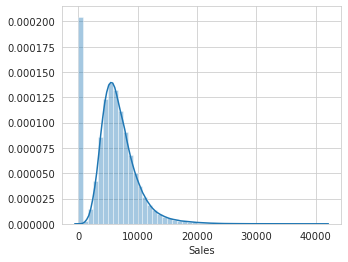

In [12]:
# distribucion de ventas
sb.distplot(train['Sales'])

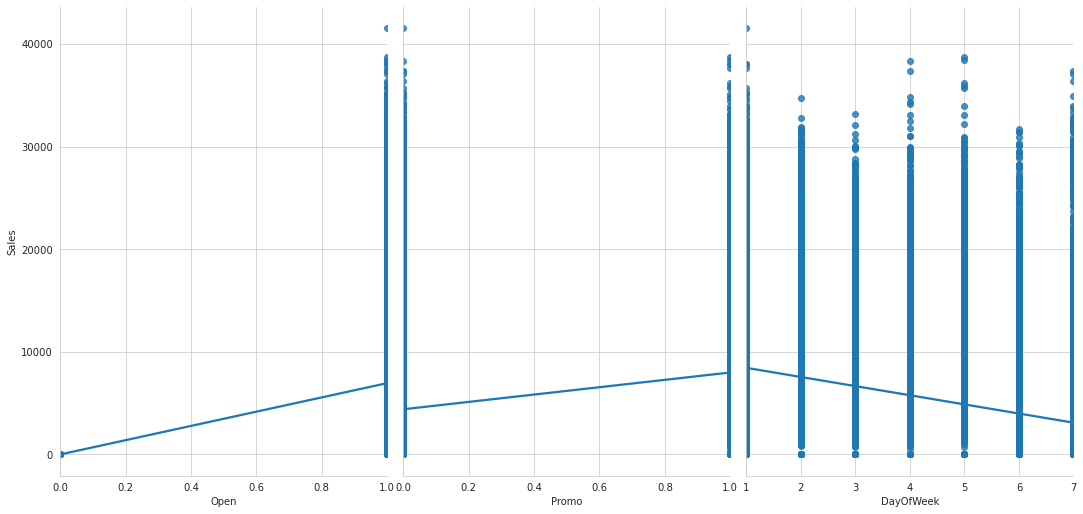

In [13]:
import seaborn as sns

%matplotlib inline
sns.pairplot(train, x_vars=['Open', 'Promo', 'DayOfWeek'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
 8   year           1017209 non-null  int64 
 9   month          1017209 non-null  int64 
 10  day            1017209 non-null  int64 
 11  day_name       1017209 non-null  object
dtypes: int64(10), object(2)
memory usage: 93.1+ MB


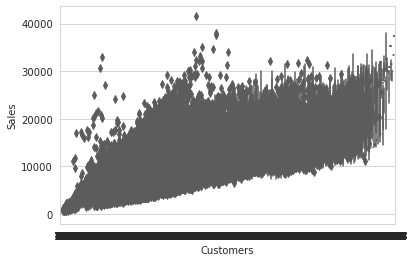

In [15]:
# observamos si existen valores outlayer
sb.boxplot(x='Customers', y='Sales', data=train, palette='hls')

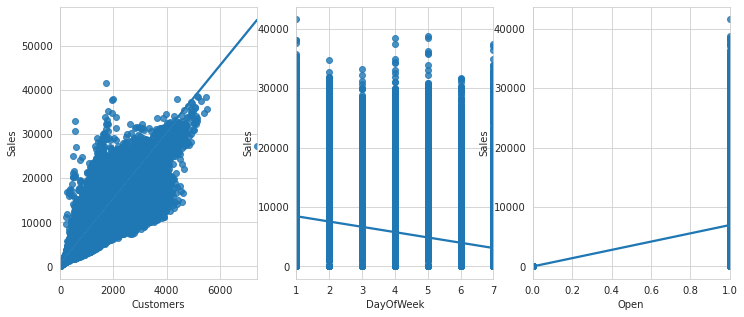

In [17]:
# para mostrar la relacion directa o indirecta entre X Y
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sb.regplot(x="Customers", y="Sales", data=train,ax=ax1)
sb.regplot(x="DayOfWeek", y="Sales", data=train,ax=ax2)
sb.regplot(x="Open", y="Sales", data=train,ax=ax3)

In [20]:
y = train['Sales']
y = train.Sales
y.head()




0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [21]:


feature_cols = ['Customers']


X = train[feature_cols]

X = train[['Customers']]

# print the first 5 rows
X.head()

,Customers
0,555
1,625
2,821
3,1498
4,559


In [22]:
#train = train.drop(['Store', 'Customers', 'Open', 'Promo', 'StateHoliday','SchoolHoliday'], axis = 1) 
# import  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(762906, 1)
(254303, 1)
(762906,)
(254303,)


In [25]:
# inicializamos 
lm = LinearRegression()

In [27]:
# calculamos todos los betas
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
# calculamos b0 b1
print(lm.intercept_)
print(lm.coef_)

1075.026146204893
[7.42128875]


In [31]:
zip(feature_cols, lm.coef_)

In [32]:
y_pred = lm.predict(X_test)

In [33]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

1226.0996307127095


In [34]:
# calculate MSE using scikit-learn (Error cuadratico medio)
print(metrics.mean_squared_error(y_test, y_pred))

2986012.702885178


In [35]:
# coeficiente de determinacion
r2_score(y_test, y_pred)
# customers explica el 80% de la variabilidad de ventas

0.7983170088871446

# Ridge

In [36]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.80


In [37]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.80


In [38]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.80


# Lasso

In [39]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.80
Test set score: 0.80
Number of features used: 1


# Create quadratic and cubic features

In [40]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_train)
X_cubic = cubic.fit_transform(X_train)

In [42]:
linreg = LinearRegression()
linreg_cuad = linreg.fit(X_quad, y_train)
y_quad_fit = linreg_cuad.predict(quadratic.fit_transform(X_test))
quadratic_r2 = r2_score(y_test, y_quad_fit) #lm.predict(X_quad))
print(quadratic_r2)
# exite un 84 de explicacion, de customes a ventas, usando un ajuste no lineal de tipo cuadratico

0.8399739746418313
